In [1]:
#import related libraries
import pandas as pd
import matplotlib.pyplot as plt #plot a graph 
import seaborn as sns #plot interactive graph
from pylab import rcParams #customize Matplotlib plots using rcParams

#loading data
file_name = "https://raw.githubusercontent.com/eozhisarcikli/model-of-customer-churn/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_df = pd.read_csv(file_name) 

#quick look to data
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#for numeric columns
print(churn_df.describe()) #get summary stats on numeric columns
print("\nSeniorCitizen : ", churn_df.SeniorCitizen.unique()) #view unique values
print("\ntenure        : ",churn_df.tenure.unique()) #view unique values
print("\nMonthlyCharges: ",churn_df.MonthlyCharges.unique()) #view unique values

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

SeniorCitizen :  [0 1]

tenure        :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


In [ ]:
#number of unchurned/churned customers
print("\nUnchurned(No)/Churned(Yes):\n",churn_df['Churn'].value_counts(sort = False))


Unchurned(No)/Churned(Yes):
 No     5174
Yes    1869
Name: Churn, dtype: int64


In [ ]:
#summary of data
print ("\nRows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nMissing values :  ", churn_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn_df.nunique())


Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
churn_df_copy = churn_df.copy() #take a copy
churn_df_copy.drop(['customerID','MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True) #drop some columns for analysis
churn_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
#calculating churn percentage for every feature
pivot = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])
pivot['Churn_Percentage'] = pivot['Yes'] / (pivot['No'] + pivot['Yes'])
pivot

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

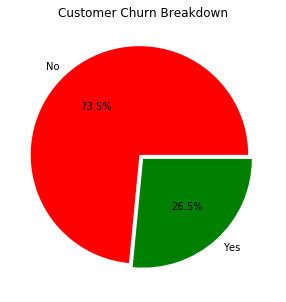

In [ ]:
#feature preparation for plot
sizes = churn_df['Churn'].value_counts(sort = True)
explode = (0.05,0)
labels = churn_df['Churn'].value_counts(sort = True).index
colors = ["red","green"]
rcParams['figure.figsize'] = 5,5

#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Customer Churn Breakdown')
plt.show()

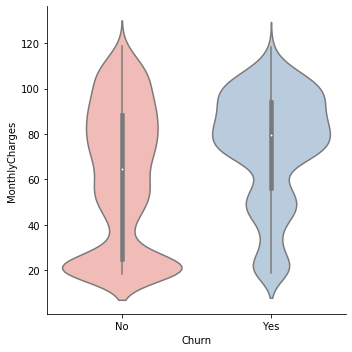

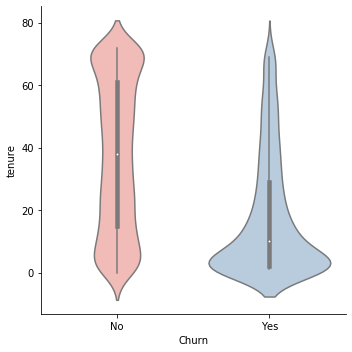

In [ ]:
#creating a violin plot showing how monthy charges relate to churn
sns.catplot(x="Churn", y = "MonthlyCharges",data = churn_df, kind="violin", palette = "Pastel1")
#creating a violin plot showing how tenure relate to churn
sns.catplot(x="Churn", y = "tenure",data = churn_df, kind="violin", palette = "Pastel1")

First violin plot shows that customers who have churned tend to pay higher monthly rates than customers who haven't churned.

Second violin plot shows that churned customers are new customers. So maybe they joined and they weren't happy with the service.